**To begin the data analysis process, I loaded the dataset using the pandas library and performed an initial inspection to understand its structure and contents.**

In [1]:
import pandas as pd
df = pd.read_csv("/content/taitanic.csv")
df.head() # Default shows top 5 rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Why it matters:**


*  Understand the structure (rows and columns).
*  Identify potential data quality issues (e.g., missing values, inconsistent formatting).
* Get a sense of the types of variables (categorical, numerical, text).

In [2]:
df.shape

(418, 12)

*  PassengerId

  Unique identifier for each passenger.
Typically not used for modeling; mainly for record-keeping.

*  Survived

  Target variable indicating survival (1 = survived, 0 = did not survive).
Used as the outcome for predictive models.

* Pclass

   Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
Represents socio-economic status; important predictor.

* Name

   Full name of the passenger.
Usually not used directly but can extract features (e.g., Title).

* Sex

   Gender of the passenger.
Key categorical predictor for survival.

*  Age

   Age of the passenger in years.
Numerical feature; may contain missing values.



* SibSp

  Number of siblings/spouses aboard the Titanic.
Used as a feature indicating family size.



* Parch

   Number of parents/children aboard.
Another family-related feature.

* Ticket

   Ticket number.
Usually considered irrelevant; rarely used directly.


* Fare

   Passenger fare paid.
Numerical feature; reflects socio-economic status.


*  Cabin

  Cabin number.
Often missing; can indicate passenger location or class.

*  Embarked

  Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
Categorical feature related to passenger origin.
*  Has_Cabin

  Derived binary feature indicating whether a cabin number is known.
Used as a proxy for class or passenger importance.


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Why it matters:**

Missing values can cause issues in statistical analysis and machine learning models, which typically require complete data. Imputing missing values prevents data loss and maintains consistency.

**Steps Taken to Fix it:**

*  Used .fillna() to replace NaN with the median of each column.
*  Median is robust to outliers, making it a safe choice for skewed data.





In [7]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())


**Why it matters:**

'Cabin' has too many missing values to be useful directly. Instead of dropping the column, creating a binary feature allows us to preserve potentially useful info about whether the passenger had a cabin.

**Steps Taken to Fix it:**


*  Created a new binary feature Has_Cabin indicating presence of cabin info.
*  Replaced missing values in Cabin with "Unknown" for consistency.


In [8]:
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)


In [9]:
df['Cabin'] = df['Cabin'].fillna("Unknown")


In [10]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Has_Cabin      0
dtype: int64


**Why it matters:**

Duplicate rows can bias your analysis and model training by over-representing certain data points.

**Steps Taken to Fix it:**

*  Used df.duplicated() to detect duplicate rows.


In [11]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
print(f"Total Duplicates: {df.duplicated().sum()}")


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Has_Cabin]
Index: []
Total Duplicates: 0


**Why it matters:**

Inconsistent casing (e.g., "male", "Male", "MALE") causes multiple entries for the same category, leading to incorrect value counts and unreliable modeling.

**Steps Taken to Fix it:**

*  Used .str.lower() to standardize text to lowercase.
*  Ensures uniform categories across the dataset.

In [12]:
# Normalize text formatting
for col in ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']:
    df[col] = df[col].astype(str).str.lower()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,892,0,3,"kelly, mr. james",male,34.5,0,0,330911,7.8292,unknown,q,0
1,893,1,3,"wilkes, mrs. james (ellen needs)",female,47.0,1,0,363272,7.0000,unknown,s,0
2,894,0,2,"myles, mr. thomas francis",male,62.0,0,0,240276,9.6875,unknown,q,0
3,895,0,3,"wirz, mr. albert",male,27.0,0,0,315154,8.6625,unknown,s,0
4,896,1,3,"hirvonen, mrs. alexander (helga e lindqvist)",female,22.0,1,1,3101298,12.2875,unknown,s,0


**Why it matters:**

The 'Age' column contained float values. Rounding to integers can make analysis easier, especially when grouping or visualizing.

**Steps Taken to Fix it:**

* Converted to float to ensure consistent type, then rounded and converted to int.


In [13]:
#Round to nearest integer
df['Age'] = df['Age'].astype(float).round().astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,892,0,3,"kelly, mr. james",male,34,0,0,330911,7.8292,unknown,q,0
1,893,1,3,"wilkes, mrs. james (ellen needs)",female,47,1,0,363272,7.0000,unknown,s,0
2,894,0,2,"myles, mr. thomas francis",male,62,0,0,240276,9.6875,unknown,q,0
3,895,0,3,"wirz, mr. albert",male,27,0,0,315154,8.6625,unknown,s,0
4,896,1,3,"hirvonen, mrs. alexander (helga e lindqvist)",female,22,1,1,3101298,12.2875,unknown,s,0


**Why it matters:**

Columns like 'PassengerId', 'Ticket', and 'Cabin' may not contribute meaningfully to your analysis or model and could introduce noise.

**Steps Taken to Fix it:**

* Removed columns using drop() with axis=1 to drop columns.

In [14]:
#Irrelevant Columns
df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)


**Why it matters:**

Outliers can distort statistical summaries and mislead models. Detecting them helps with cleaning or transforming the data.

**Steps Taken to Fix it:**

* Applied the IQR method to find outliers in:Age, SibSp, Parch, Fare


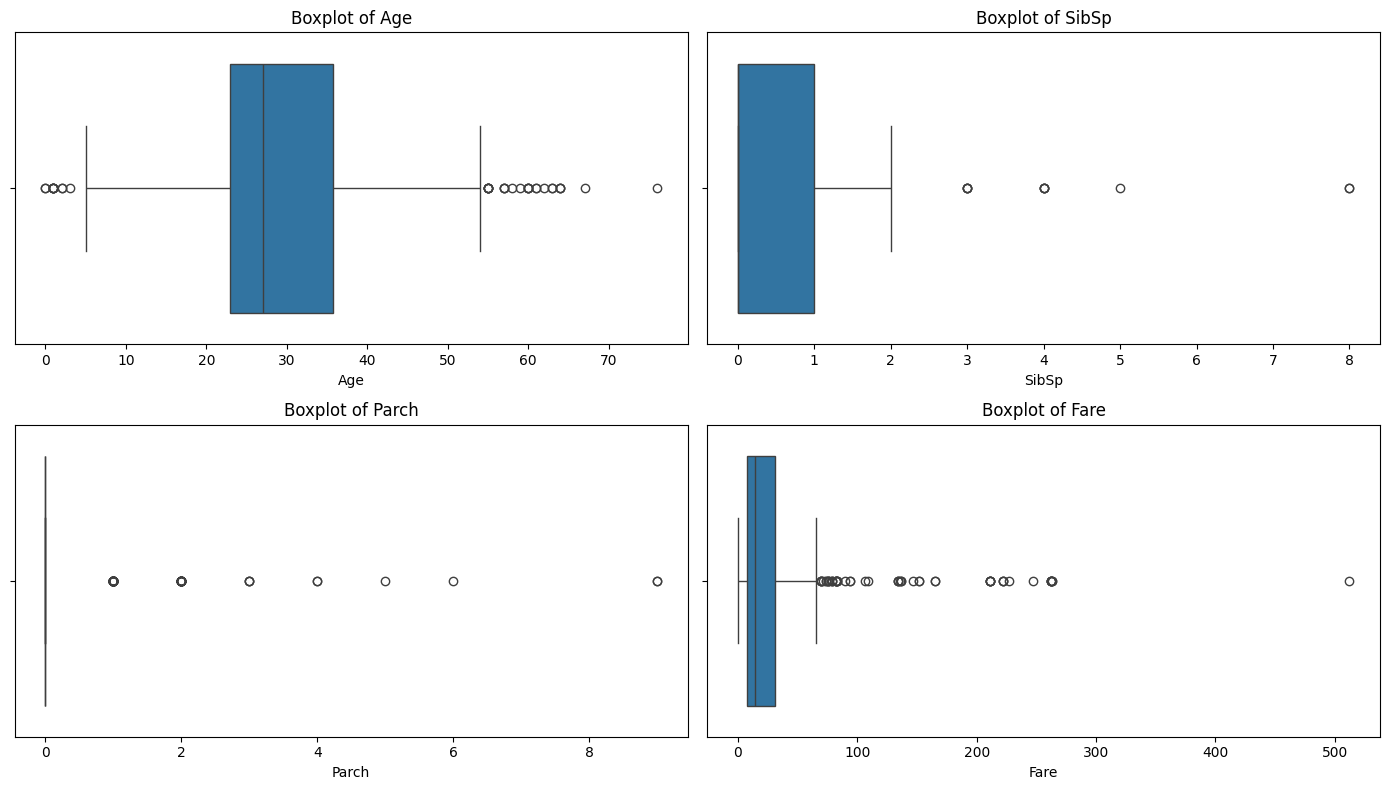

In [15]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Outliers in numerical columns
outliers_age = detect_outliers_iqr(df, 'Age')
outliers_sibsp = detect_outliers_iqr(df, 'SibSp')
outliers_parch = detect_outliers_iqr(df, 'Parch')
outliers_fare = detect_outliers_iqr(df, 'Fare')

import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()




**Why it matters:**

* Boxplots help visually identify outliers and understand distributions of numerical columns.
* Names are not useful directly, but titles like Mr., Mrs., Dr. can be helpful for understanding social status, which may relate to survival.

**Steps Taken to Fix it:**

* Used Seaborn’s boxplot() to visualize outliers for all numerical columns.
* Used regex with str.extract() to extract titles from the Name column.

In [16]:
# Rare categories in categorical columns
print("Unique values in Sex:\n", df['Sex'].value_counts())
print("Unique values in Embarked:\n", df['Embarked'].value_counts())

# Optional: extract title from Name
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\.', expand=False)
print("Rare Titles:\n", df['Title'].value_counts())

Unique values in Sex:
 Sex
male      266
female    152
Name: count, dtype: int64
Unique values in Embarked:
 Embarked
s    270
c    102
q     46
Name: count, dtype: int64
Rare Titles:
 Title
mr        240
miss       78
mrs        72
master     21
col         2
rev         2
ms          1
dr          1
dona        1
Name: count, dtype: int64


**Why Cleaning Names Matters:**

*  Data Consistency: Ensures names follow a uniform format, which is important for data integrity.
* Improved Matching and Analysis: Cleaned names make it easier to group, match, or merge data.
* Better Readability and Presentation: Makes names clearer for reports or user interfaces.
* Support for Machine Learning: Removes noise that could affect models using names as input.


**Steps Taken to Fix the Names:**


*  Extract the Last Name:

   The part before the comma is assumed to be the last name.
   
*  Check for a Real Name in Parentheses:

   If a name is given in parentheses, it is extracted and used.

*  Fallback to Name Without Title:

   If there are no parentheses, the code skips titles (like Mr., Dr.) and uses the rest of the name.

*  Combine Real Name and Last Name:

   Formats the name as "FirstName LastName" for clarity.

*  Remove Punctuation and Special Characters:

  Cleans the name by keeping only letters, numbers, and spaces.
*  Normalize Whitespace:

  Removes extra spaces and trims leading/trailing whitespace.


In [18]:
import re

def clean_name(name):
    # Extract last name
    last_name = name.split(',')[0].strip()

    # Extract the real name in parentheses if it exists
    match = re.search(r'\(([^)]+)\)', name)
    if match:
        real_name = match.group(1)
    else:
        # Remove title and take the rest
        name_after_comma = name.split(',')[1].strip()
        name_parts = name_after_comma.split()
        real_name = ' '.join(name_parts[1:])  # Skip the title

    # Combine real name and last name
    full_name = f"{real_name} {last_name}"

    # Remove punctuation/special characters
    full_name = re.sub(r'[^\w\s]', '', full_name)  # Keep only letters, numbers, spaces

    # Normalize whitespace
    full_name = re.sub(r'\s+', ' ', full_name).strip()

    return full_name

# Apply to the dataset
df['Cleaned_Name'] = df['Name'].apply(clean_name)
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title,Cleaned_Name
0,0,3,"kelly, mr. james",male,34,0,0,7.8292,q,0,mr,james kelly
1,1,3,"wilkes, mrs. james (ellen needs)",female,47,1,0,7.0000,s,0,mrs,ellen needs wilkes
2,0,2,"myles, mr. thomas francis",male,62,0,0,9.6875,q,0,mr,thomas francis myles
3,0,3,"wirz, mr. albert",male,27,0,0,8.6625,s,0,mr,albert wirz
4,1,3,"hirvonen, mrs. alexander (helga e lindqvist)",female,22,1,1,12.2875,s,0,mrs,helga e lindqvist hirvonen
5,0,3,"svensson, mr. johan cervin",male,14,0,0,9.2250,s,0,mr,johan cervin svensson
6,1,3,"connolly, miss. kate",female,30,0,0,7.6292,q,0,miss,kate connolly
7,0,2,"caldwell, mr. albert francis",male,26,1,1,29.0000,s,0,mr,albert francis caldwell
8,1,3,"abrahim, mrs. joseph (sophie halaut easu)",female,18,0,0,7.2292,c,0,mrs,sophie halaut easu abrahim
9,0,3,"davies, mr. john samuel",male,21,2,0,24.1500,s,0,mr,john samuel davies


In [19]:
df.drop(columns=['Name'], inplace=True)


In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title,Cleaned_Name
0,0,3,male,34,0,0,7.8292,q,0,mr,james kelly
1,1,3,female,47,1,0,7.0000,s,0,mrs,ellen needs wilkes
2,0,2,male,62,0,0,9.6875,q,0,mr,thomas francis myles
3,0,3,male,27,0,0,8.6625,s,0,mr,albert wirz
4,1,3,female,22,1,1,12.2875,s,0,mrs,helga e lindqvist hirvonen
